<a href="https://colab.research.google.com/github/trista-paul/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/module1-scrape-and-process-data/LS_DS_121_Scrape_and_process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Scrape and process data

Objectives
- scrape and parse web pages
- use list comprehensions
- select rows and columns with pandas

Links
-  [Automate the Boring Stuff with Python, Chapter 11](https://automatetheboringstuff.com/chapter11/)
  - Requests
  - Beautiful Soup
- [Python List Comprehensions: Explained Visually](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Subset Observations (Rows)
  - Subset Variables (Columns)
- Python Data Science Handbook
  - [Chapter 3.1](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), Introducing Pandas Objects
  - [Chapter 3.2](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html), Data Indexing and Selection


## Scrape the titles of PyCon 2018 talks

In [0]:
url = 'https://us.pycon.org/2018/schedule/talks/list/'
import bs4
import requests
result = requests.get(url)
type(result.text) #confirms str

In [3]:
result #successful

<Response [200]>

In [4]:
type(result)

requests.models.Response

In [6]:
type(result.text) #confirms str

str

In [10]:
soup = bs4.BeautifulSoup(result.text)
soup.select('h2')
#print(soup) #dont do this

[<h2>
 <a href="/2018/schedule/presentation/127/" id="presentation-127">
         A Bit about Bytes: Understanding Python Bytecode
       </a>
 </h2>, <h2>
 <a href="/2018/schedule/presentation/81/" id="presentation-81">
         Adapting from Spark to Dask: what to expect
       </a>
 </h2>, <h2>
 <a href="/2018/schedule/presentation/152/" id="presentation-152">
         All in the timing: How side channel attacks work
       </a>
 </h2>, <h2>
 <a href="/2018/schedule/presentation/84/" id="presentation-84">
         Analyzing Data: What pandas and SQL Taught Me About Taking an Average
       </a>
 </h2>, <h2>
 <a href="/2018/schedule/presentation/96/" id="presentation-96">
         A practical guide to Singular Value Decomposition in Python
       </a>
 </h2>, <h2>
 <a href="/2018/schedule/presentation/71/" id="presentation-71">
         Augmenting Human Decision Making with Data Science
       </a>
 </h2>, <h2>
 <a href="/2018/schedule/presentation/159/" id="presentation-159">
      

In [11]:
type(soup.select('h2'))

list

In [12]:
len(soup.select('h2')) #95 talks

95

In [13]:
first = soup.select('h2')[0] #first talk
first

<h2>
<a href="/2018/schedule/presentation/127/" id="presentation-127">
        A Bit about Bytes: Understanding Python Bytecode
      </a>
</h2>

In [14]:
first.text #cleaner but has problems

'\n\n        A Bit about Bytes: Understanding Python Bytecode\n      \n'

In [15]:
first.text.strip() #defaults to strip white spaces and newline parse

'A Bit about Bytes: Understanding Python Bytecode'

In [21]:
last = soup.select('h2')[-1] #last talk
print(type(last)) #tag
print(type(soup.select('h2')[-1:])) #list, not useful

<class 'bs4.element.Tag'>
<class 'list'>


In [22]:
#our complete list of titles loop style
titles = []
for tag in soup.select('h2'):
  tag.text.strip()
  titles.append(titles)
#list comp style
titles = [tag.text.strip() for tag in soup.select('h2')]
type(titles), len(titles)

(list, 95)

In [23]:
titles[0], titles[-1]

('A Bit about Bytes: Understanding Python Bytecode',
 "You're an expert. Here's how to teach like one.")

## 5 ways to look at long titles

Let's define a long title as greater than 80 characters

### 1. For Loop

In [24]:
#nonfunctional compared to other methods
long_titles = []
for title in titles:
  if len(title) > 80:
    long_titles.append(title)
len(long_titles)

5

### 2. List Comprehension

In [25]:
long_titles = [title for title in titles if len(title) > 80]
len(long_titles)

5

### 3. Filter with named function

In [26]:
def long(title):
  return len(title) > 80
long('Hello') #False
list(filter(long, titles)) #filter by itself is an object

['Code like an accountant: Designing data systems for accuracy, resilience and auditability',
 'Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus',
 'How we designed an inclusivity-first conference on a shoestring budget and short timeline',
 'Listen, Attend, and Walk : Interpreting natural language navigational instructions',
 'The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications']

### 4. Filter with anonymous function

In [27]:
list(filter(lambda t: len(t)>80, titles))

['Code like an accountant: Designing data systems for accuracy, resilience and auditability',
 'Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus',
 'How we designed an inclusivity-first conference on a shoestring budget and short timeline',
 'Listen, Attend, and Walk : Interpreting natural language navigational instructions',
 'The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications']

### 5. Pandas

pandas documentation: [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)

In [29]:
import pandas as pd
pd.options.display.max_colwidth = 200
df = pd.DataFrame({'title': titles})
df[df.title.str.len() > 80]

,title
19,"Code like an accountant: Designing data systems for accuracy, resilience and auditability"
28,Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus
46,How we designed an inclusivity-first conference on a shoestring budget and short timeline
51,"Listen, Attend, and Walk : Interpreting natural language navigational instructions"
78,The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications


In [0]:
condition = df.title.str.len() > 80 #calls a Series of booleans
df[condition]
df.title.str.len() #calls a Series of ints equal to str.len

## Make new dataframe columns

pandas documentation: [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)

### title length

In [0]:
df['title_length'] = df.title.apply(len)
df.head()

In [0]:
df.loc[df['title_length']>80, 'title length']]

### long title

In [32]:
df['long_title'] = df.title.str.len() > 80
df.head()
#alt
df[df['long_title' == True]]

,title,title_length,long_title
0,A Bit about Bytes: Understanding Python Bytecode,False,False
1,Adapting from Spark to Dask: what to expect,False,False
2,All in the timing: How side channel attacks work,False,False
3,Analyzing Data: What pandas and SQL Taught Me About Taking an Average,False,False
4,A practical guide to Singular Value Decomposition in Python,False,False


### first letter

In [37]:
df['first_letter'] = df.title.str[0]
df.head()

df[df['first_letter'] == 'P']

,title,title_length,long_title,first_letter
55,Performance Python: Seven Strategies for Optimizing Your Numerical Code,False,False,P
56,Pipenv: The Future of Python Dependency Management,False,False,P
57,Practical Sphinx,False,False,P
58,Programming microbes using Python,False,False,P
59,Pumping up Python modules using Rust,False,False,P
60,Python 2 to 3: How to Upgrade and What Features to Start Using,False,False,P
61,Python 3: ten years later,False,False,P
62,Python across the USA: This is the Bus.,False,False,P
63,Python Data Sonification for Science and Discovery,False,False,P
64,Python for the quantum computing age,False,False,P


### word count

Using [`textstat`](https://github.com/shivam5992/textstat)

In [38]:
!pip install textstat

    100% |████████████████████████████████| 3.0MB 6.5MB/s 
  Running setup.py bdist_wheel for textstat ... - done
  Stored in directory: /root/.cache/pip/wheels/04/ac/d7/a05c0ad7825899f11eacd5f9a5a78534808c8159281e65863c
Successfully built textstat


In [41]:
import textstat
first = df.title.values[0]
last = df.title.values[-1]
first, last
textstat.lexicon_count(first), textstat.lexicon_count(last)

(7, 9)

In [43]:
df['title_word_count'] = df.title.apply(textstat.lexicon_count)
df[df['title_word_count'] <= 3]

,title,title_length,long_title,first_letter,title_word_count
6,Automating Code Quality,False,False,A,3
8,Behavior-Driven Python,False,False,B,2
21,Coding through Adversity,False,False,C,3
52,Love your bugs,False,False,L,3
57,Practical Sphinx,False,False,P,2
76,Taking Django Async,False,False,T,3


## Rename column

`title length` --> `title character count`

pandas documentation: [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [45]:
df['title_character_count'] = df['title_length']
df.head()
#alt
df = df.rename(columns={'title_legth': 'title_cha'})
df.columns

Index(['title', 'title_length', 'long_title', 'first_letter',
       'title_word_count', 'title_character_count'],
      dtype='object')

## Analyze the dataframe

### Describe

pandas documentation: [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [47]:
import numpy as np
df.describe(exclude=np.number)

,title,title_length,long_title,first_letter,title_character_count
count,95,95,95,95,95
unique,95,2,2,21,2
top,The Journey Over the Intermediate Gap,False,False,P,False
freq,1,90,90,12,90


### Sort values

pandas documentation: [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

In [48]:
df.sort_values(by='title_character_count').head()

,title,title_length,long_title,first_letter,title_word_count,title_character_count
0,A Bit about Bytes: Understanding Python Bytecode,False,False,A,7,False
68,Reactive Programming with RxPy,False,False,R,4,False
67,Randomness in Python: Controlled Chaos in an Ordered Machine,False,False,R,9,False
66,Python Performance Investigation by Example,False,False,P,5,False
65,"Python, Locales and Writing Systems",False,False,P,5,False


Five shortest titles, by character count

In [51]:
df['first_letter'] = df['first_letter'].str.upper()
df.sort_values(by='first_letter', ascending=False).head()

,title,title_length,long_title,first_letter,title_word_count,title_character_count
94,You're an expert. Here's how to teach like one.,False,False,Y,9,False
93,Win back lovely API: GraphQL in Python,False,False,W,7,False
91,What is a Python Core Developer?,False,False,W,6,False
90,Visual Testing with PyCharm and pytest,False,False,V,6,False
89,Visualizing Algorithms with Python and Programmable LEDs,False,False,V,7,False


Titles sorted reverse alphabetically

### Get value counts

pandas documentation: [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)


Frequency counts of first letters

In [52]:
df['first_letter'].value_counts().sort_index()

"     1
A     7
B    11
C     8
D     7
E     5
F     3
G     2
H     5
I     2
L     3
O     2
P    12
R     3
S     6
T    11
U     2
V     2
W     2
Y     1
Name: first_letter, dtype: int64

In [53]:
df[df['first_letter']=='""']

,title,title_length,long_title,first_letter,title_word_count,title_character_count


Percentage of talks with long titles

In [55]:
df['long_title'].value_counts()/len(df)
#alt
df['long_title'].value_counts(normalize=True)*100

False    94.736842
True      5.263158
Name: long_title, dtype: float64

### Plot

pandas documentation: [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)





Top 5 most frequent first letters

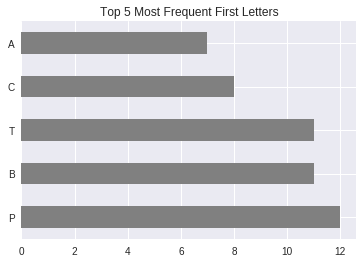

In [58]:
%matplotlib inline
(df['first_letter'].value_counts().head()
 .plot.barh(color='grey', title='Top 5 Most Frequent First Letters'));
#suppress subplot object with ;


Histogram of title lengths, in characters

In [59]:
title = 'Dist of Character Count'
df['title_character_count'].plot.hist(title=title);

TypeError: ignored

# Assignment

**Scrape** the talk descriptions. Hint: `soup.select('.presentation-description')`

**Make** new columns in the dataframe:
- description
- description character count
- description word count
- description grade level (use [this `textstat` function](https://github.com/shivam5992/textstat#the-flesch-kincaid-grade-level) to get the Flesh-Kincaid grade level)

**Describe** all the dataframe's columns. What's the average description word count? The minimum? The maximum?

**Answer** these questions:
- Which descriptions could fit in a tweet?
- What's the distribution of grade levels? Plot a histogram.



In [61]:
description = [tag.text.strip() for tag in soup.select('.presentation-description')]
df['description'] = description
df.head(2)

,title,title_length,long_title,first_letter,title_word_count,title_character_count,description
0,A Bit about Bytes: Understanding Python Bytecode,False,False,A,7,False,At some point every Python programmer sees Python bytecode files -- they're those '.pyc' files Python likes to leave behind after it runs. But have you ever wondered what's really going on in thos...
1,Adapting from Spark to Dask: what to expect,False,False,A,8,False,"Until very recently, Apache Spark has been a de facto standard choice of a framework for batch data processing. For Python developers, diving into Spark is challenging, because it requires learnin..."


In [68]:
df['desc_character_count'] = df.description.apply(len)
df['desc_word_count'] = df.description.apply(textstat.lexicon_count)
df['desc_gradelv'] = df.description.apply(textstat.flesch_kincaid_grade
                     (str(tag.text.strip() for tag in soup.select
                     ('.presentation-description'))))               
df.head()

TypeError: ignored

In [0]:
df[df['desc_word_count'] <= 140]